# Use financial criteria and probability criteria to evaluate Neural Network model 

In [1]:
# import libraries
import pandas as pd
import warnings
import sys
import os

warnings.filterwarnings("ignore") # Ignore warnings

# Get the absolute path of the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

# Add `src` to the system path
sys.path.insert(0, src_path)

from tests.hypothesisTest import hypothesisTest
from tests.financialTest import financialTest

## Financial Test

In [2]:
df = pd.read_csv('../data/processed/VNINDEX_add_features.csv')
in_sample_total_profit, total_trade_number, win_rate, profit_factor = financialTest(df,model='NeuralNetwork',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns')
print(f'Total profit: {in_sample_total_profit}')
print(f'Total trade number: {total_trade_number}')
print(f'Win rate: {win_rate}')
print(f'Profit factor: {profit_factor}')


(6423, 4)
(6423,)
41/41 [==============================] - 0s 659us/step
Finally capital:  2002576.856200001
The model helps us to get profit
The win rate is higher than 0.5 and lower than 0.8
The profit factor is higher than 1, that's good
Total profit: 2576.8562000009697
Total trade number: 67
Win rate: 0.5671641791044776
Profit factor: 1.1999393429168776


## Hypothesis Test

In [3]:
data = []
for i in range(100):
    df = pd.read_csv(f'../data/processed/out_of_sample_{i+1}.csv')
    data.append(df)
total_profit_list = hypothesisTest(data,model='NeuralNetwork',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns',financial_feature='total_profit')
total_profit_list = [float(total_profit) for total_profit in total_profit_list]
print(f'Total profit list: {total_profit_list}')

(6423, 4)
(6423,)
41/41 [==============================] - 0s 599us/step
Finally capital:  2001170.8855180915
Finally capital:  2004984.546714277
Finally capital:  2006905.3057764606
Finally capital:  2006245.8736233676
Finally capital:  2004914.561097536
Finally capital:  2003411.5374890922
Finally capital:  2000823.959568333
Finally capital:  2001260.4633897615
Finally capital:  2005869.8310432192
Finally capital:  2003078.288953959
Finally capital:  2001747.1078896741
Finally capital:  2006009.4752205398
Finally capital:  2002596.6717040893
Finally capital:  2001224.8919146007
Finally capital:  2003647.617598496
Finally capital:  2002127.0536450823
Finally capital:  2003060.1452139753
Finally capital:  2005780.3838703916
Finally capital:  2002644.9890761075
Finally capital:  2007737.355628255
Finally capital:  2005190.1176385072
Finally capital:  2004372.230656337
Finally capital:  2004828.872538528
Finally capital:  2003088.510608853
Finally capital:  2003366.7940098129
Finally cap

# Plot data to compare between LinearRegression, DecisionTree, RandomForest

DecisionTree profit 1970.641 lies in the center of the distribution.
p-value: 0.740
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
LinearRegression profit -9132.414 lies in the left tail of the distribution.
p-value: 1.000
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
RandomForest profit 2729.838 lies in the center of the distribution.
p-value: 0.710
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.
NeuralNetwork profit 2576.856 lies in the center of the distribution.
p-value: 0.710
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.


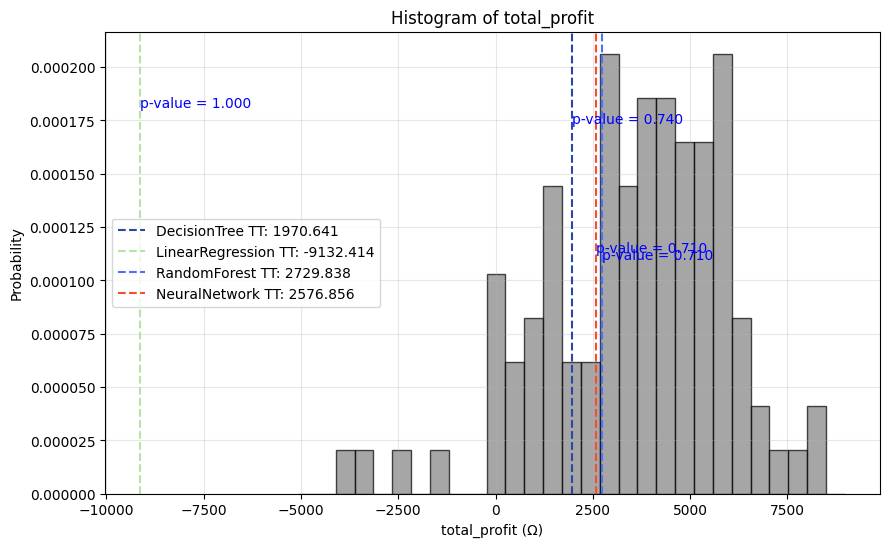

In [4]:
from visualization.histogram import plot_histogram
plot_histogram(total_profit_list,{'DecisionTree':1970.641,'LinearRegression':-9132.414043806493,'RandomForest':2729.837818058906,'NeuralNetwork':in_sample_total_profit})